### 가짜 뉴스 탐지기

In [23]:
pip install simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.8/250.8 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 101.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 96.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 117.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 91.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 20.5 MB/s e

In [33]:
!nvidia-smi

Wed Nov  8 00:49:53 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0    47W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# 데이터 전처리

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

fake_path = '/content/drive/MyDrive/학술제/Fake (1).csv'
true_path = '/content/drive/MyDrive/학술제/True (1).csv'
fake_df = pd.read_csv(fake_path)
true_df = pd.read_csv(true_path)


## 데이터 불러오기

In [ ]:
print(fake_df.head(3))


                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  


## fake_df의 데이터 확인

In [ ]:
print(true_df.tail(3))

                                                   title  \
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text    subject  \
21414  MINSK (Reuters) - In the shadow of disused Sov...  worldnews   
21415  MOSCOW (Reuters) - Vatican Secretary of State ...  worldnews   
21416  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...  worldnews   

                   date  
21414  August 22, 2017   
21415  August 22, 2017   
21416  August 22, 2017   


## ture_df의 데이터 확인

In [ ]:
print(true_df.tail(3))

                                                   title  \
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text    subject  \
21414  MINSK (Reuters) - In the shadow of disused Sov...  worldnews   
21415  MOSCOW (Reuters) - Vatican Secretary of State ...  worldnews   
21416  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...  worldnews   

                   date  
21414  August 22, 2017   
21415  August 22, 2017   
21416  August 22, 2017   


## 진짜 뉴스와 가짜 뉴스를 구분하기 위한 label 열 생성

In [ ]:
fake_df['label'] = 1
true_df['label'] = 0

## fake_df, true_df를 result_df에 합쳐서 저장

In [ ]:
result_df = pd.concat([fake_df, true_df], ignore_index=True)

## 확인

In [ ]:
print(result_df[['title','label']].tail(3))

                                                   title  label
44895  Minsk cultural hub becomes haven from authorities      0
44896  Vatican upbeat on possibility of Pope Francis ...      0
44897  Indonesia to buy $1.14 billion worth of Russia...      0


In [ ]:
result_df['label'].value_counts()

1    23481
0    21417
Name: label, dtype: int64

In [ ]:
result_df['subject'].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

<Axes: title={'center': 'Percentage of Subject'}, ylabel='subject'>

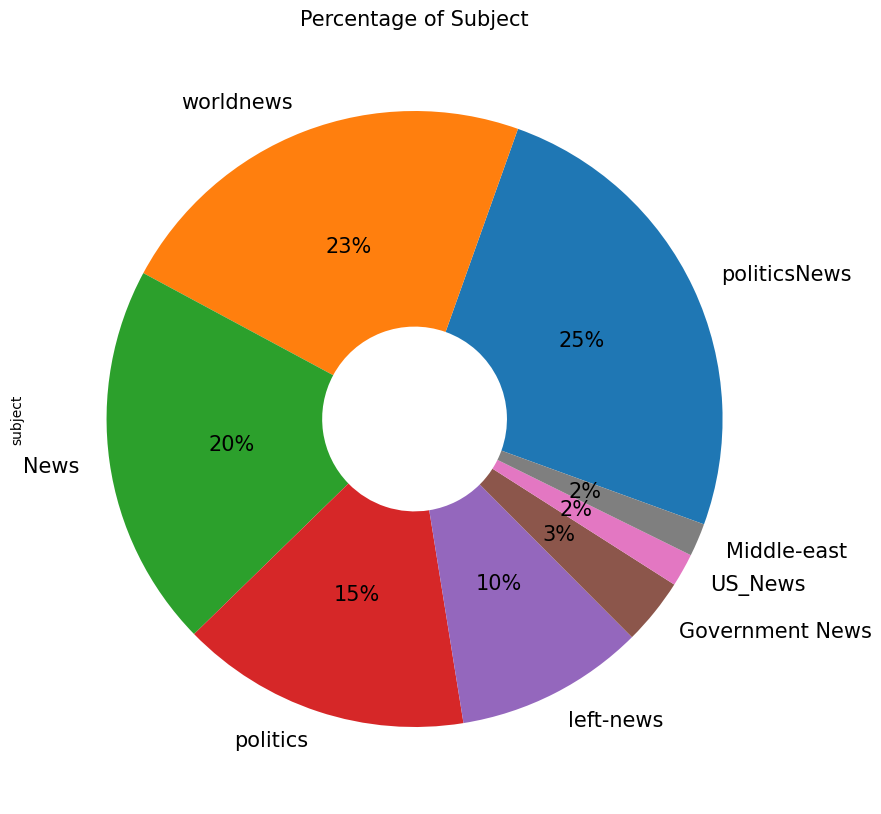

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.title('Percentage of Subject', fontsize=15)
result_df['subject'].value_counts().plot(kind='pie', \
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,
                              textprops={'fontsize': 15})


## 새로운 열 message_length를 만들어주고 text, title의 문자 길이를 저장

In [ ]:
result_df['message_length'] = result_df['text'].apply(len)
result_df['message_length'] += result_df['title'].apply(len)

In [ ]:
print(result_df['message_length'].tail(3))

44895    1999
44896    1260
44897    1390
Name: message_length, dtype: int64


# 데이터 전처리

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download("names")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk.corpus import names

In [ ]:
all_names = set(names.words())

In [ ]:
all_names_copy = list(all_names)
print(all_names_copy[:5])

['Ashley', 'Rhett', 'Pepe', 'Marga', 'Salim']


## clean text함수 적용

In [ ]:
#clean_text 함수는 mess에 있는 string.punctuation, stop_words, all_names의 값들을 모두 제거해주고, 모든 대문자 알파벳을 소문자로 바꿔준다
import string
def clean_text(mess):
    stop_words = stopwords.words('english')
    del_punctuation = [char.lower() for char in mess if char not in string.punctuation]
    del_punctuation = ''.join(del_punctuation)

    return ' '.join([word for word in del_punctuation.split() if word.lower() not in (stop_words or all_names)])

In [ ]:
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
result_df['clean_message'] = result_df['text'].apply(clean_text)
result_df['clean_message'] += result_df['title'].apply(clean_text)

## clean_message와 text를 비교해보면 불필요한 표현들이 없어진 것을 확인


# 다른 데이터셋 추가


In [ ]:
import urllib
import json

def load_convert_data(url):
    """
    Downloads the json file from net and convert into pandas dataframe format.
    """
    with urllib.request.urlopen(url) as url:
        df = json.loads(url.read().decode())
        df = pd.DataFrame.from_dict(df)

    return df


In [ ]:
# Real news data
real_train = load_convert_data("https://storage.googleapis.com/public-resources/dataset/real_train.json")
real_test = load_convert_data("https://storage.googleapis.com/public-resources/dataset/real_test.json")


# Fake news data
fake_train = load_convert_data("https://storage.googleapis.com/public-resources/dataset/fake_train.json")
fake_test = load_convert_data("https://storage.googleapis.com/public-resources/dataset/fake_test.json")


# quick look on real news training data
real_train.head()
# Quick look on Fake news training data
fake_train.head()

,url,title,text
0,https://nabd.com/s/71539812-b7228b/%D9%86%D8%B...,Online Facts New conspiracy theory: #Bel_Gates...,Roger Stone suggested on Monday that Bill Gate...
1,https://shamra.sy/news/article/8eb73454931e6d1...,Revolutionary Guards: Corona could be an Ameri...,Source\nRussia Today |\nIranian Revolutionary ...
2,https://sudanewsnow.com/19800/,Yellow skin is the host environment of the vir...,Sudan news now from all sources sudanewsnow.co...
3,https://arabic.rt.com/press/1100276-%D8%A7%D9%...,China and Russia are doing what the European U...,China and Russia are doing what the European U...
4,https://www.kachaf.com/details.php?n=5e8957fe1...,,Fatal error: Uncaught MongoDB\Driver\Exception...


# 다른 작업입니다

In [ ]:
print(result_df[['clean_message', 'text']])

                                           clean_message  \
0      donald trump wish americans happy new year lea...   
1      house intelligence committee chairman devin nu...   
2      friday revealed former milwaukee sheriff david...   
3      christmas day donald trump announced would bac...   
4      pope francis used annual christmas day message...   
...                                                  ...   
44893  brussels reuters nato allies tuesday welcomed ...   
44894  london reuters lexisnexis provider legal regul...   
44895  minsk reuters shadow disused sovietera factori...   
44896  moscow reuters vatican secretary state cardina...   
44897  jakarta reuters indonesia buy 11 sukhoi fighte...   

                                                    text  
0      Donald Trump just couldn t wish all Americans ...  
1      House Intelligence Committee Chairman Devin Nu...  
2      On Friday, it was revealed that former Milwauk...  
3      On Christmas day, Donald Trump annou

# result_df에서 clean_message와 label만 추출

In [ ]:
use_df = result_df[['clean_message','label']]
real_df = use_df[use_df['label'] == 0]
fake_df = use_df[use_df['label'] == 1]
use_df

,clean_message,label
0,donald trump wish americans happy new year lea...,1
1,house intelligence committee chairman devin nu...,1
2,friday revealed former milwaukee sheriff david...,1
3,christmas day donald trump announced would bac...,1
4,pope francis used annual christmas day message...,1
...,...,...
44893,brussels reuters nato allies tuesday welcomed ...,0
44894,london reuters lexisnexis provider legal regul...,0
44895,minsk reuters shadow disused sovietera factori...,0
44896,moscow reuters vatican secretary state cardina...,0


## 전체 데이터에서 테스트 사이즈를 10%로 설정하고, random_state를 1234로 설정

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
data_path = '/content/drive/MyDrive/학술제/clean_message.csv'

data = pd.read_csv(data_path)

In [2]:
real_df = data[data['label']==0]
fake_df = data[data['label']==1]
real_df

,clean_message,label
1,chicago bears starting quarterbacks last 10 ye...,0
3,mccain opposed requirement government buy amer...,0
7,says paul ryan still endorsing trump,0
9,federal government thinks authority regulate t...,0
10,austin city basically doubled size every 25 ye...,0
...,...,...
64458,nhs services could take long 2 years recover e...,0
64460,yesterday erroneously reported 7 new cases jig...,0
64462,indiafightscorona 📍 increasing number covid19 ...,0
64464,current understanding covid19 spreads mostly p...,0


In [8]:
real_train, real_test = train_test_split(real_df, test_size=0.2, random_state=42)
fake_train, fake_test = train_test_split(fake_df, test_size = 0.2, random_state=42)

In [9]:
real_train.shape, real_test.shape,fake_train.shape, fake_test.shape

((24740, 2), (6185, 2), (26834, 2), (6709, 2))

In [10]:
train = pd.concat([real_train, fake_train], ignore_index=True)
test = pd.concat([real_test, fake_test], ignore_index=True)

In [11]:
print('Shape of train set {}'.format(train.shape))
print('Shape of test  set {}'.format(test.shape))

Shape of train set (51574, 2)
Shape of test  set (12894, 2)


# Cuda 사용

In [38]:
!pip install torch torchvision torchaudio --upgrade


In [3]:
import numpy as np
import math
import re
import pandas as pd
from bs4 import BeautifulSoup
import random

In [4]:
import torch

print(torch.__version__)


# TPU 디바이스를 얻습니다.




# 나머지 훈련 과정...


2.1.0+cu118


In [ ]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('TPU')
for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)


# Roberta 모델 사용

In [5]:
# Default Configuration : https://simpletransformers.ai/docs/usage/#configuring-a-simple-transformers-model

'''
ClassificationArgs(adafactor_beta1: float=None,
                   adafactor_clip_threshold: float=1.0,
                   adafactor_decay_rate: float=-0.8,
                   adafactor_eps: tuple=dataclasses._HAS_DEFAULT_FACTORY_CLASS instance,
                   adafactor_relative_step: bool=True, adafactor_scale_parameter: bool=True,
                   adafactor_warmup_init: bool=True,
                   adam_epsilon: float=1e-08,
                   best_model_dir: str='outputs/best_model',
                   cache_dir: str='cache_dir/',
                   config: dict=dataclasses._HAS_DEFAULT_FACTORY_CLASS instance,
                   cosine_schedule_num_cycles: float=0.5,
                   custom_layer_parameters: list=dataclasses._HAS_DEFAULT_FACTORY_CLASS instance,
                   custom_parameter_groups: list=dataclasses._HAS_DEFAULT_FACTORY_CLASS instance,
                   dataloader_num_workers: int=0,
                   do_lower_case: bool=False,
                   dynamic_quantize: bool=False,
                   early_stopping_consider_epochs: bool=False,
                   early_stopping_delta: float=0,
                   early_stopping_metric: str='eval_loss',
                   early_stopping_metric_minimize: bool=True,
                   early_stopping_patience: int=3,
                   encoding: str=None,
                   eval_batch_size: int=8,
                   evaluate_during_training: bool=False,
                   evaluate_during_training_silent: bool=True,
                   evaluate_during_training_steps: int=2000,
                   evaluate_during_training_verbose: bool=False,
                   evaluate_each_epoch: bool=True,
                   fp16: bool=True,
                   gradient_accumulation_steps: int=1,
                   learning_rate: float=4e-05,
                   local_rank: int=-1,
                   logging_steps: int=50,
                   manual_seed: int=None,
                   max_grad_norm: float=1.0,
                   max_seq_length: int=128,
                   model_name: str=None,
                   model_type: str=None,
                   multiprocessing_chunksize: int=-1,
                   n_gpu: int=1,
                   no_cache: bool=False,
                   no_save: bool=False,
                   not_saved_args: list=dataclasses._HAS_DEFAULT_FACTORY_CLASS instance,
                   num_train_epochs: int=1,
                   optimizer: str='AdamW',
                   output_dir: str='outputs/',
                   overwrite_output_dir: bool=False,
                   polynomial_decay_schedule_lr_end: float=1e-07,
                   polynomial_decay_schedule_power: float=1.0,
                   process_count: int=dataclasses._HAS_DEFAULT_FACTORY_CLASS instance,
                   quantized_model: bool=False,
                   reprocess_input_data: bool=True,
                   save_best_model: bool=True,
                   save_eval_checkpoints: bool=True,
                   save_model_every_epoch: bool=True,
                   save_optimizer_and_scheduler: bool=True,
                   save_steps: int=2000,
                   scheduler: str='linear_schedule_with...',
                   silent: bool=False,
                   skip_special_tokens: bool=True,
                   tensorboard_dir: str=None,
                   thread_count: int=None,
                   tokenizer_name: str=None,
                   tokenizer_type: str=None,
                   train_batch_size: int=8,
                   train_custom_parameters_only: bool=False,
                   use_cached_eval_features: bool=False,
                   use_early_stopping: bool=False,
                   use_hf_datasets: bool=False,
                   use_multiprocessing: bool=True,
                   use_multiprocessing_for_evaluation: bool=True,
                   wandb_kwargs: dict=dataclasses._HAS_DEFAULT_FACTORY_CLASS instance,
                   wandb_project: str=None,
                   warmup_ratio: float=0.06,
                   warmup_steps: int=0,
                   weight_decay: float=0.0,
                   model_class: str='ClassificationModel',
                   labels_list: list=dataclasses._HAS_DEFAULT_FACTORY_CLASS instance,
                   labels_map: dict=dataclasses._HAS_DEFAULT_FACTORY_CLASS instance,
                   lazy_delimiter: str='\t',
                   lazy_labels_column: int=1,
                   lazy_loading: bool=False,
                   lazy_loading_start_line: int=1,
                   lazy_text_a_column: bool=None,
                   lazy_text_b_column: bool=None,
                   lazy_text_column: int=0,
                   onnx: bool=False,
                   regression: bool=False,
                   sliding_window: bool=False,
                   special_tokens_list: list=dataclasses._HAS_DEFAULT_FACTORY_CLASS instance,
                   stride: float=0.8,
                   tie_value: int=1) -> None
                   )
'''

"\nClassificationArgs(adafactor_beta1: float=None,\n                   adafactor_clip_threshold: float=1.0,\n                   adafactor_decay_rate: float=-0.8,\n                   adafactor_eps: tuple=dataclasses._HAS_DEFAULT_FACTORY_CLASS instance,\n                   adafactor_relative_step: bool=True, adafactor_scale_parameter: bool=True,\n                   adafactor_warmup_init: bool=True,\n                   adam_epsilon: float=1e-08,\n                   best_model_dir: str='outputs/best_model',\n                   cache_dir: str='cache_dir/',\n                   config: dict=dataclasses._HAS_DEFAULT_FACTORY_CLASS instance,\n                   cosine_schedule_num_cycles: float=0.5,\n                   custom_layer_parameters: list=dataclasses._HAS_DEFAULT_FACTORY_CLASS instance,\n                   custom_parameter_groups: list=dataclasses._HAS_DEFAULT_FACTORY_CLASS instance,\n                   dataloader_num_workers: int=0,\n                   do_lower_case: bool=False,\n    

In [6]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs

# Reference : https://simpletransformers.ai/docs/classification-specifics/

# Optional model configuration
model_args = ClassificationArgs(num_train_epochs=5, train_batch_size=128, eval_batch_size=128, use_early_stopping=True, sliding_window=True)

# Create a ClassificationModel
model = ClassificationModel("roberta", "roberta-base", use_cuda = True, num_labels=2, args=model_args)


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [12]:
# Train the model
model.train_model(train)

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/51574 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (634 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (531 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (516 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (550 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (535 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for thi

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/1138 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/1138 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/1138 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/1138 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/1138 [00:00<?, ?it/s]

(5690, 0.04500676658459135)

In [13]:
result, model_outputs, wrong_predictions = model.eval_model(test)

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/12894 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (780 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (599 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (578 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (713 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (700 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for thi

Running Evaluation:   0%|          | 0/286 [00:00<?, ?it/s]

In [14]:

print("Matthews correlation coefficient (MCC) : {}".format(result['mcc']))
print("True positive : {}".format(result['tp']))
print("True negative : {}".format(result['tn']))
print("False positive : {}".format(result['fp']))
print("False negative : {}".format(result['fn']))
print("Eval Loss : {}".format(result['eval_loss']))


Matthews correlation coefficient (MCC) : 0.9820008750423032
True positive : 6631
True negative : 6147
False positive : 38
False negative : 78
Eval Loss : 0.040534075268160004


In [30]:
test_data = test['clean_message']
test_data[12891]

'donald trump president scary prospect sane americans politicians gop democrat alike way behind bloviating fool crazy dangerous violent supporters california governor jerry brown taken one step turned trump constant talk building walls right back around brown fact says california need wall trump becomes presidentbrown made statements dinner party labor union said crowd promise trump ever elected build wall around california defend rest country governor brown assured cheering laughing crowd kidding way joke like walls like bridges brown went point important immigration american workforce old white guys ought recognize whole pension system would collapse bunch young people coming country state coming coming places brown right course walls solution bridges however trump band lunatics take america wall around california anyone else wanting shield travesty might bad ideawatch video governor brown remarks belowfeatured image via screen capture jerry brown facebookca gov we’d ‘have build wall

In [31]:
test_data = test['clean_message']
predictions, raw_outputs = model.predict(test_data[12891])

  0%|          | 0/1035 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

In [32]:
print(predictions,raw_outputs)

[1 1 0 ... 1 1 1] [array([[-1.38183594,  0.89501953]]), array([[-1.04101562,  0.546875  ]]), array([[ 0.73828125, -0.60693359]]), array([[-4.078125  ,  2.94921875]]), array([[ 0.72363281, -0.70019531]]), array([[-1.38183594,  0.89501953]]), array([[-3.52734375,  2.453125  ]]), array([[-2.39257812,  1.59667969]]), array([[ 1.71191406, -1.35058594]]), array([[-1.91894531,  1.203125  ]]), array([[-0.79785156,  0.29467773]]), array([[-1.88183594,  1.25878906]]), array([[-3.52734375,  2.453125  ]]), array([[-1.88183594,  1.25878906]]), array([[ 1.71191406, -1.35058594]]), array([[-2.09765625,  1.37402344]]), array([[-2.15429688,  1.35351562]]), array([[-1.60839844,  0.89550781]]), array([[-1.38183594,  0.89501953]]), array([[-2.09765625,  1.37402344]]), array([[ 0.73828125, -0.60693359]]), array([[-2.39257812,  1.59667969]]), array([[-3.52734375,  2.453125  ]]), array([[-2.15429688,  1.35351562]]), array([[ 1.23535156, -1.1484375 ]]), array([[-4.078125  ,  2.94921875]]), array([[ 1.71191406

In [33]:
test['label'][12891]
if predictions[0]==0:
  print("News is Real")
else:
  print("News is False")

News is False


In [34]:
test['label'][12891]

1

In [35]:
#학습 데이터와 검증 데이터로 나눌 train_test_split, naive bayes 모델인 MultinomialNB, clean_message에 있는 단어들의 특징 추출을 위해 문자열 데이터를 수치 벡터로 변환시켜주는 CountVectorizer를 import
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sentence_transformers import SentenceTransformer

ModuleNotFoundError: ignored

In [ ]:
real_train['clean_message']

29152    new york reuters swipe pen us president donald...
38769    beirut reuters lebanese president michel aoun ...
40618    luxembourg reuters european police forces cann...
23604    washington reuters compromise republican tax b...
24728    reuters us senator susan collins maine moderat...
                               ...                        
34765    abuja reuters united states formally agreed se...
35445    johannesburg reuters nearly man south african ...
28871    washington reuters president donald trump said...
24341    washington reuters republican tax plan unveile...
39276    sydney reuters un high commissioner refugees s...
Name: clean_message, Length: 17133, dtype: object

In [ ]:
sentences = [real_train['clean_message'].iloc[0]]
embeddings = model.encode(sentences)
embeddings.shape

(1, 1024)

## 단어들의 출현 빈도를 체크하기 위한 vectorizer를 생성

In [ ]:
X_train[0]

'donald trump wish americans happy new year leave instead give shout enemies haters dishonest fake news media former reality show star one job country rapidly grows stronger smarter want wish friends supporters enemies haters even dishonest fake news media happy healthy new year president angry pants tweeted 2018 great year america country rapidly grows stronger smarter want wish friends supporters enemies haters even dishonest fake news media happy healthy new year 2018 great year america donald j trump realdonaldtrump december 31 2017trump tweet went welll expectwhat kind president sends new year greeting like despicable petty infantile gibberish trump lack decency even allow rise gutter long enough wish american citizens happy new year bishop talbert swan talbertswan december 31 2017no one likes calvin calvinstowell december 31 2017your impeachment would make 2018 great year america also accept regaining control congress miranda yaver mirandayaver december 31 2017do hear talk includ

In [ ]:
vectorizer = CountVectorizer()

## X_train과 X_test의 데이터를 vectorizer를 통해 수치 벡터로 만들어 X_train_docs와 X_test_docs에 넣기

In [ ]:
X_train_docs = vectorizer.fit_transform(X_train)
X_test_docs = vectorizer.transform(X_test)
print(X_train_docs.shape, X_test_docs.shapezz)

(31428, 207868) (13470, 207868)


##  수치 벡터로 만들어진 데이터를 넘파이 배열로 바꿔준다

In [ ]:
X_train_docs.toarray()
X_test_docs.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## MultinomialNB 모델을 alpha=1, fit_prior=True로 설정하여 navive_bayer에 저장

In [ ]:
naive_bayes = MultinomialNB(alpha=1, fit_prior=True)
naive_bayes.fit(X_train_docs, y_train)

MultinomialNB(alpha=1)

MultinomialNB(alpha=1)

In [ ]:
#predict를 사용하면 0과 1만을 반환하여 0은 가짜 뉴스 1은 진짜 뉴스가 되게 된다.

In [ ]:
y_pred = naive_bayes.predict(X_test_docs)
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
# predict_proba를 사용하면 0일 가능성과 1일 가능성을 둘 다 출력해준다

In [ ]:
y_pred_proba = naive_bayes.predict_proba(X_test_docs)
y_pred_proba

array([[1.44370683e-084, 1.00000000e+000],
       [6.84226586e-004, 9.99315773e-001],
       [1.54851509e-016, 1.00000000e+000],
       ...,
       [1.00000000e+000, 6.05089154e-119],
       [1.00000000e+000, 3.01655703e-019],
       [1.00000000e+000, 1.15350827e-084]])

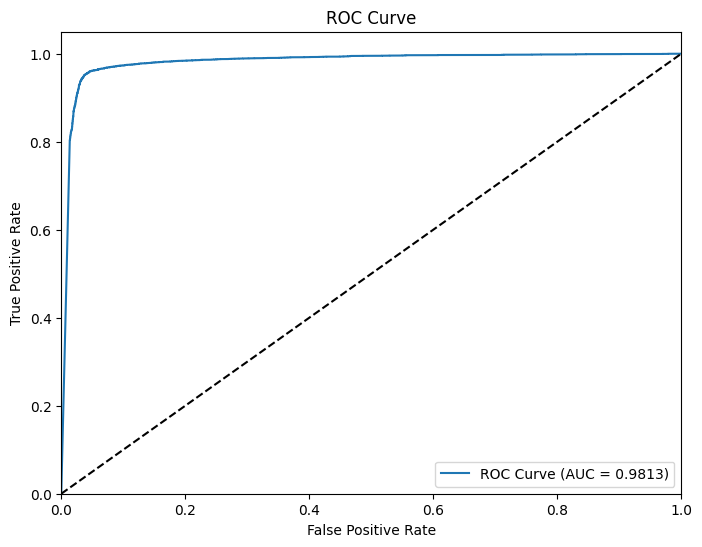

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 실제 레이블과 예측 확률을 이용하여 ROC 커브를 생성
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])  # y_test는 실제 레이블이어야 합니다.

# AUC를 계산
auc = roc_auc_score(y_test, y_pred_proba[:, 1])

# ROC 커브 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %.4f)' % auc)  # AUC 값을 소수점 4자리까지 표시
plt.plot([0, 1], [0, 1], 'k--')  # 랜덤한 분류의 경우의 직선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


# 파리미터 튜닝

## GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {
    'alpha': [ 0.25, 0.5 ,1],
    'fit_prior': [True, False]
}

In [ ]:
grid_search = GridSearchCV(naive_bayes, parameters, n_jobs=-1, cv=6, scoring="roc_auc")

In [ ]:
grid_search.fit(X_train_docs, y_train)

GridSearchCV(cv=6, estimator=MultinomialNB(alpha=1), n_jobs=-1,
             param_grid={'alpha': [0.25, 0.5, 1], 'fit_prior': [True, False]},
             scoring='roc_auc')

GridSearchCV(cv=6, estimator=MultinomialNB(alpha=1), n_jobs=-1,
             param_grid={'alpha': [0.25, 0.5, 1], 'fit_prior': [True, False]},
             scoring='roc_auc')

In [ ]:
 #best_params_를 통해 임의로 설정한 파라미터의 값 중에서 가장 좋은 결과를 반환하는 파라미터를 알 수 있음

grid_search.best_params_


{'alpha': 0.25, 'fit_prior': True}

In [ ]:
naive_bayes_best = grid_search.best_estimator_
y_pred_proba = naive_bayes_best.predict_proba(X_test_docs)

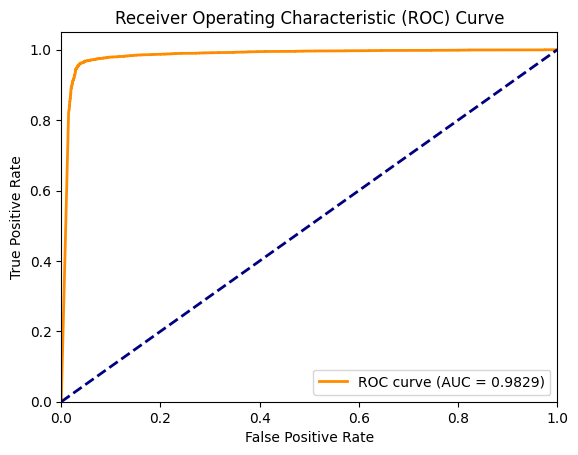

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# ROC 곡선을 그리기 위한 데이터 준비
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

# AUC 값을 문자열로 형식화
auc_str = '%.4f' % roc_auc

# ROC 곡선 그리기
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %s)' % auc_str)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.show()


In [ ]:
import joblib

# 모델과 벡터라이저 저장
joblib.dump(naive_bayes_best, 'naive_bayes_best_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

In [ ]:
# 기존 위젯들 및 필요한 라이브러리 임포트
import ipywidgets as widgets
from IPython.display import display, clear_output
import joblib  # 모델을 저장하고 불러오기 위해 사용

# 모델 불러오기
naive_bayes_best = joblib.load('naive_bayes_best_model.pkl')  # 학습된 모델 파일
vectorizer = joblib.load('vectorizer.pkl')  # 벡터라이저 파일

# 입력 필드 설정
text_0 = widgets.HTML(value="<h2>뉴스 텍스트 입력</h2>")
news_input = widgets.Textarea(placeholder='뉴스 텍스트를 입력해 주세요')

vbox_0 = widgets.VBox([text_0, news_input])

# 버튼 및 출력 설정
search_button = widgets.Button(description='가짜 뉴스 확인하기', style={'description_width': 'initial'})
output = widgets.Output()

def on_button_clicked(event):
    with output:
        clear_output()
        # 입력된 텍스트 전처리
        cleaned_text = clean_text(news_input.value)  # clean_text 함수는 위에서 정의된 대로
        vectorized_text = vectorizer.transform([cleaned_text])  # 벡터라이징
        prediction = naive_bayes_best.predict(vectorized_text)  # 예측
        if prediction[0] == 0:
            print("진짜 뉴스로 예측됩니다.")
        else:
            print("가짜 뉴스로 예측됩니다.")

search_button.on_click(on_button_clicked)
vbox_result = widgets.VBox([search_button, output])

# 최종 페이지 디스플레이
page = widgets.VBox([vbox_0, vbox_result])
display(page)
